13023번 ABCDE <span style="color:red">실패</span> - 2025.03.28

In [ ]:
# 어떻게 보면 기본적인 dfs문제이다. 일단 문제 이해를 못함...
# 그리고 그래프를 수열로면 다뤄봤지 직접 입력해서 만드는 법을 몰랐음.
# 문제를 보면 5명이 친구가 되는 경우 하나라도 있으면 1출력 (n명 아니고 5명!!!!)
# 1. 입력받는 값으로 그래프를 만든다
# 2. dfs함수에서 visited 리스트를 사용하여 그래프 방문 여부를 체크한다.
# 3. depth가 5가 되면 arrive = True
# 4. 이때 dfs의 start변수는 for문을 이용하여 친구 개개인에 대해 돌리므로
# 5. arrive = True로 바뀌면 break, 1 출력!
# 6. break안되고 for문이 끝나면 0 출력!

def dfs(start, depth):
    global ans

    visited[start] = True # 시작한 노드 방문 처리
    if depth == 5:
        ans = True
        return
    for i in graph[start]: # start와 이어져있는 노드 탐색 시작
        if not visited[i]: # start와 이어져 있는 노드 중 방문하지 않은 노드가 있다면
            dfs(i, depth + 1) # 더 들어가기!
    visited[start] = False # 백트래킹

n, m = map(int, input().split())
graph = [[] for _ in range(n)]
visited = [False] * n
ans = False

for _ in range(m):
    a, b = map(int, input().split())
    graph[a].append(b)
    graph[b].append(a)

for i in range(n): # start 값 바꿔주며 dfs 호출하기 위해
    dfs(i, 1)
    if ans:
        print(1)
        break
else:
    print(0)

1260번 DFS와 BFS <span style="color:green">성공</span> - 2025.03.29

In [ ]:
# 기본적인 그래프, DFS, BFS 문제

from collections import deque

def dfs(v):
    visited[v] = True
    print(v, end=' ')

    for i in graph[v]:
        if not visited[i]:
            dfs(i)

def bfs(v):
    q = deque()
    q.append(v)
    visited[v] = True

    while q:
        x = q.popleft()
        print(x, end=' ')

        for i in graph[x]:
            if not visited[i]:
                q.append(i)
                visited[i] = True

n, m, v = map(int, input().split())
graph = [[] for _ in range(n + 1)]

for _ in range(m):
    a, b = map(int, input().split())
    graph[a].append(b)
    graph[b].append(a)

for i in range(n + 1):
    graph[i] = sorted(graph[i])

visited = [False for _ in range(n + 1)]
dfs(v)
print()
visited = [False for _ in range(n + 1)]
bfs(v)

11724번 연결 요소의 개수 <span style="color:green">성공</span> - 2025.03.30

In [ ]:
# 그래프가 몇개의 덩어리로 이루어져있는지 확인하는 문제
# 기본 dfs함수를 사용하는데 백트래킹 없이 구현
# 예제 1을 예시로,
# dfs를 1부터 시작하고 나오면 visited = [0, 1, 1, 0, 0, 1, 0]
# 이렇게 되면 한 덩어리에 대해 탐색이 끝난것이므로 ans += 1
# 이후 방문을 안한 노드에서 대해서 반복적으로 dfs 실행하면 정답이 나온다.

import sys
sys.setrecursionlimit(10**6)
input = sys.stdin.readline

def dfs(start):
    visited[start] = True

    for v in graph[start]:
        if not visited[v]:
            dfs(v)

n, m = map(int, input().split())
graph = [[] for _ in range(n + 1)]
for _ in range(m):
    u, v = map(int, input().split())
    graph[u].append(v)
    graph[v].append(u)
visited = [False for _ in range(n + 1)]

ans = 0
for i in range(1, n + 1):
    if not visited[i]:
        ans += 1
        dfs(i)

print(ans)

1707번 이분 그래프 <span style="color:red">실패</span> - 2025.03.31

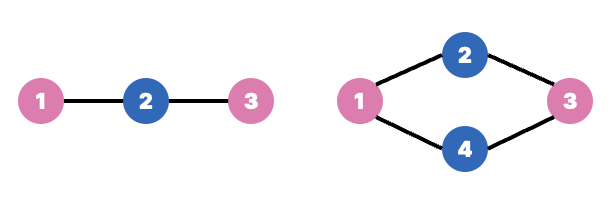

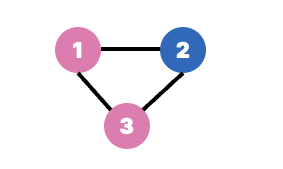

https://e-juhee.tistory.com/entry/python-%EB%B0%B1%EC%A4%80-1707-%EC%9D%B4%EB%B6%84-%EA%B7%B8%EB%9E%98%ED%94%84?category=1097015

In [ ]:
# 처음 작성한 코드랑 비교해서 왜 틀렸는지 블로그에도 작성하기
# 이분 그래프이므로 그룹을 지정한 후, visited에 저장
# 1, -1은 서로 다른 그룹, 0은 아직 방문하지 않은 노드

import sys
sys.setrecursionlimit(10**6)
# input = sys.stdin.readline

def dfs(start):
    global ans

    for num in graph[start]:
        if visited[num] != 0:
            if visited[num] == visited[start]:
                ans = False
        elif visited[num] == 0:
            visited[num] = -visited[start]
            dfs(num)

k = int(input())

for _ in range(k):
    V, E = map(int, input().split())
    graph = [[] for _ in range(V + 1)]
    for _ in range(E):
        u, v = map(int, input().split())
        graph[u].append(v)
        graph[v].append(u)
    visited = [0 for _ in range(V + 1)]
    
    ans = True
    for i in range(1, V + 1):
        if visited[i] == 0:
            visited[i] = 1
            dfs(i)
            if not ans:
                print('NO')
                break
    else:
        print('YES')

2667번 단지번호붙이기 <span style="color:green">성공</span> - 2025.04.01

In [ ]:
# 솔직히 많이 겁먹었지만 차근차근 구현하니까 쉬운 문제였다.

def dfs(x, y):
    global cnt
    
    graph[x][y] = '0'
    cnt += 1
    
    dx = [-1, 1, 0, 0]
    dy = [0, 0, -1, 1]

    for i in range(4):
        nx = x + dx[i]
        ny = y + dy[i]

        if 0 <= nx < n and 0 <= ny < n and graph[nx][ny] == '1':
            dfs(nx, ny)
            
n = int(input())
graph = [list(input()) for _ in range(n)]

ans = 0
size = []
for i in range(n):
    for j in range(n):
        if graph[i][j] == '1':
            cnt = 0
            dfs(i, j)
            ans += 1
            size.append(cnt)

print(ans)
print(*sorted(size), sep='\n')

4963번 섬의 개수 <span style="color:green">성공</span> - 2025.04.02

In [ ]:
# 직전 문제랑 똑같은데 주의해야 할 점으론
# 직전 문제는 지도가 정사각형인 반면
# 이번 문제는 지도가 직사각형이므로
# indexing에 신경써야함 (이것때매 좀 고생했음..)
# 그리고 대각선 4방향으로도 뻗어나가야 하는거 추가!

import sys
sys.setrecursionlimit(10**6)

def dfs(x, y):
    global ans

    graph[x][y] = 0
    dx = [-1, -1, 0, 1, 1, 1, 0, -1]
    dy = [0, 1, 1, 1, 0, -1, -1, -1]

    for i in range(8):
        nx = x + dx[i]
        ny = y + dy[i]

        if 0 <= nx < h and 0 <= ny < w and graph[nx][ny] == 1:
            dfs(nx, ny)

while True:
    w, h = map(int, input().split())
    if w == 0 and h == 0:
        break
    graph = [list(map(int, input().split())) for _ in range(h)]

    ans = 0
    for i in range(h):
        for j in range(w):
            if graph[i][j] == 1:
                dfs(i, j)
                ans += 1
    print(ans)

2178번 미로 탐색 <span style="color:red">실패</span> - 2025.04.03
 - 최단 거리 탐색이므로 DFS 안됨. DFS는 최적해를 찾지 못하는 반면 BFS는 처음 나오는 결과가 최적해!

In [ ]:
# BFS로 푸는 최단경로 탐색 유형의 가장 기본적인 문제
from collections import deque

def bfs(x, y):
    q = deque()
    q.append((x, y))

    while q:
        x, y = q.popleft()
        dx = [-1, 1, 0, 0]
        dy = [0, 0, -1, 1]

        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]

            if 0 <= nx < n and 0 <= ny < m and graph[nx][ny] == 1:
                graph[nx][ny] = graph[x][y] + 1
                q.append((nx, ny))

n, m = map(int, input().split())
graph = [list(map(int, input())) for _ in range(n)]

bfs(0, 0)

print(graph[-1][-1])

7576번 토마토 <span style="color:red">실패</span> - 2025.04.04

In [ ]:
from collections import deque

def bfs():
    while q:
        x, y = q.popleft()
        dx = [-1, 1, 0, 0]
        dy = [0, 0, -1, 1]

        for i in range(4):
            nx = x + dx[i]
            ny = y + dy[i]

            if 0 <= nx < n and 0 <= ny < m and graph[nx][ny] == 0:
                graph[nx][ny] = graph[x][y] + 1
                q.append((nx, ny))

m, n = map(int, input().split())
graph = [list(map(int, input().split())) for _ in range(n)]

q = deque()
for i in range(n):
    for j in range(m):
        if graph[i][j] == 1:
            q.append((i, j))

bfs()

ans = 0
for i in range(n):
    if 0 in graph[i]:
        print(-1)
        break
    ans = max(ans, max(graph[i]))
else:
    print(ans - 1)

7562번 나이트의 이동 <span style="color:green">성공</span> - 2025.04.05

In [ ]:
# 목표 지점까지의 최단 거리 구하는 문제이므로 BFS
# 1. 여기서 dx, dy 좌표 주의
# 2. visited 대신 모든 graph를 0으로 초기화
# 3. bfs를 돌면서 graph가 0이 아닌곳은 
# 이미 그 지점의 최단 거리가 저장되어 있는 것이므로 방문 x

from collections import deque

def bfs(x, y):
    q = deque()
    q.append((x, y))

    while True:
        x, y = q.popleft()
        if x == end_x and y == end_y:
            return graph[x][y]

        dx = [-2, -1, 1, 2, 2, 1, -1, -2]
        dy = [1, 2, 2, 1, -1, -2, -2, -1]

        for i in range(8):
            nx = x + dx[i]
            ny = y + dy[i]

            if 0 <= nx < l and 0 <= ny < l and graph[nx][ny] == 0:
                graph[nx][ny] = graph[x][y] + 1
                q.append((nx, ny))

t = int(input())

for _ in range(t):
    l = int(input())
    graph = [[0 for _ in range(l)] for _ in range(l)]
    start_x, start_y = map(int, input().split())
    end_x, end_y = map(int, input().split())

    print(bfs(start_x, start_y))